In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import imblearn
print(imblearn.__version__)

0.7.0


In [2]:
data = pd.read_csv('term-deposit-marketing-2020.csv')
#data.count()
data.head()

#print(data["age"].max())



,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no


In [3]:
#Pre-process data

import seaborn as sns
import matplotlib.pyplot as plt 

#preprocess data
#one hot encoding & label enconding for the categorical variables



# X: features, y:target variable

data['housing'].replace(to_replace=['no','yes'], value=[0,1],inplace=True)
data['loan'].replace(to_replace=['no','yes'], value=[0,1],inplace=True)
data['default'].replace(to_replace=['no','yes'], value=[0,1],inplace=True)



X = data[['age', 'default', 'balance', 'housing', 'loan', 'day',  'duration', 'campaign']]

X = pd.concat([X, pd.get_dummies(data['month'])], axis=1)

X = pd.concat([X, pd.get_dummies(data['job'])], axis=1)

X = pd.concat([X, pd.get_dummies(data['marital'])], axis=1)

X = pd.concat([X, pd.get_dummies(data['education'])], axis=1)


X = pd.concat([X, pd.get_dummies(data['contact'])], axis=1)


y = data["y"]

Part 1:  Demographic information- who are more likely to buy investment product?


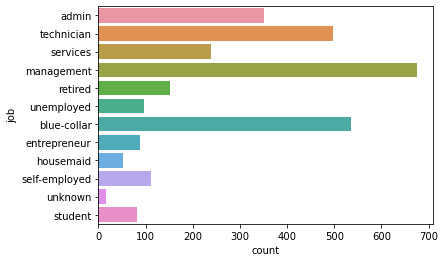

Job distribution over the people who buy the investment product
statistics over the job distribution
management       676
blue-collar      535
technician       497
admin            351
services         238
retired          151
self-employed    112
unemployed        96
entrepreneur      88
student           82
housemaid         53
unknown           17
Name: job, dtype: int64
The dominat job categories in the graph management, 
Mean ages of job categories: management, blue-collar, technician: 39.180473372781066
38.68785046728972
38.61569416498994
people from job categories management, blue-collar and technicians are in age range (30-40)are more likely to buy investment product.


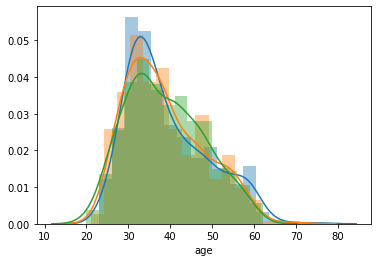

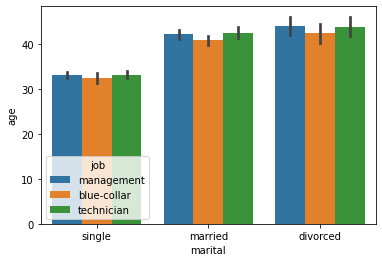

Mean age for single people who buy investment product from the three job group is around 30,
while mean age for married and divorced people who buy investment product from the three job group is around 40.
Part 2: What makes the people buy investment product?
Mean balance for manager, blue-collar, technicians: 1960.724852071006 1227.3532710280374 1784.2796780684105


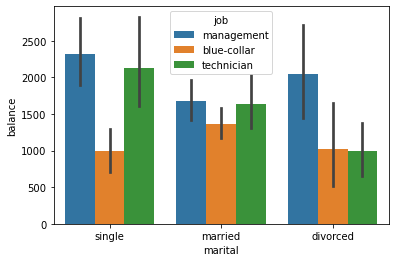

Those in management who are single or divorced and have purchased the investment product have, on average, higher balancethan those who are married and purchased the product. With blue-collars the situation is reversed: the married customers have higher balance. The single technicians who invest have the highest balance, while the divorced technician customers have the lowest balance.


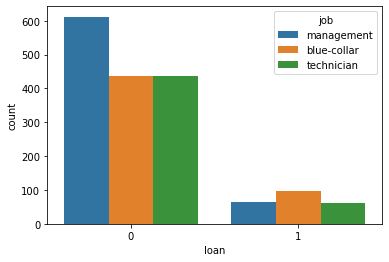

Managers, technicians and blue-collars who have not any personal loan more likely say yes, especially managers


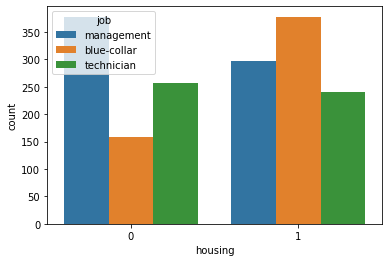

Blue-collars who have housing loan and managers who have not housing loan are more likely say yes.


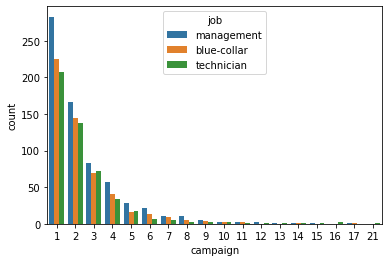

Number of contacts performed during the campaign decreases dramatically with the first three times.It means that the people generally more likely buy investment product in the first three contact, after thatthe probability to count yes decrases. 


In [4]:
#Exploratory Data Analysis

# Uncomment "data_case" & comment out "data" for the case study yes-no 
# Uncomment "data" & comment out "data_case" to see statistics&graphs over the whole data  

data_case = data[data["y"] == "yes"]  #new dataframe over customers who subscribed the terms deposit (yes) 
# write "no" instead of "yes" on the w.h.s if "no case" wanted!
#data_case = data  

X_case = data_case[['age', 'default', 'balance', 'housing', 'loan', 'day',  'duration', 'campaign']]

X_case = pd.concat([X_case, pd.get_dummies(data_case['month'])], axis=1)

X_case = pd.concat([X_case, pd.get_dummies(data_case['job'])], axis=1)

X_case = pd.concat([X_case, pd.get_dummies(data_case['marital'])], axis=1)

X_case = pd.concat([X_case, pd.get_dummies(data_case['education'])], axis=1)


X_case = pd.concat([X_case, pd.get_dummies(data_case['contact'])], axis=1)

print("Part 1:  Demographic information- who are more likely to buy investment product?")

sns.countplot(y = "job", data = data_case)  #job groups from the people
plt.show()
print("Job distribution over the people who buy the investment product")

print("statistics over the job distribution")
print(data_case["job"].value_counts())     
# these three job categories spot: management, blue-collar, technician
# we will continue data analysis over these job categories
print("The dominat job categories in the graph management, ")
job_df1 = data_case.loc[data_case["job"] == "management"]  
job_df2 = data_case.loc[data_case["job"] == "blue-collar"]
job_df3 = data_case.loc[data_case["job"] == "technician"]


print("Mean ages of job categories: management, blue-collar, technician:", job_df1["age"].mean()), print(job_df2["age"].mean()), print(job_df3["age"].mean())
print("people from job categories management, blue-collar and technicians are in age range (30-40)\
are more likely to buy investment product.") 

sns.distplot(job_df1["age"], label = "management")
sns.distplot(job_df3["age"], label = "blue-collar")
sns.distplot(job_df2["age"], label = "technician")
plt.show()

job_dff = [job_df1, job_df2, job_df3]
job_df = pd.concat(job_dff)

sns.barplot(x = "marital", y = "age", hue= "job", data = job_df)
plt.show()
print("Mean age for single people who buy investment product from the three job group is around 30,")
print("while mean age for married and divorced people who buy investment product from the three job group is around 40.")


print("Part 2: What makes the people buy investment product?")

print("Mean balance for manager, blue-collar, technicians:", job_df1["balance"].mean(), job_df2["balance"].mean(), job_df3["balance"].mean())

sns.barplot(x = "marital", y = "balance", hue= "job", data = job_df)
plt.show()

print("Those in management who are single or divorced and have purchased the investment product have, on average, higher balance\
than those who are married and purchased the product. With blue-collars the situation is reversed: the married customers \
have higher balance. The single technicians who invest have the highest balance, while the divorced technician customers have \
the lowest balance.")
#marital-balance graph:  
sns.countplot(x = "loan", hue= "job", data = job_df)
plt.show()
print("Managers, technicians and blue-collars who have not any personal loan more likely say yes, especially managers")
sns.countplot(x = "housing", hue= "job", data = job_df)
plt.show()
print("Blue-collars who have housing loan and managers who have not housing loan are more likely say yes.")
sns.countplot(x = "campaign", hue = "job", data = job_df)
plt.show()
print("Number of contacts performed during the campaign decreases dramatically with the first three times.\
It means that the people generally more likely buy investment product in the first three contact, after that\
the probability to count yes decrases. ")


In [5]:
#changes in ML algorihm:
#1. Oversampling is added for imbalanced yes-no binary classification data
#2. StratifiedKFold cross valid algorithm is chosen for imbalance class distribution

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_predict 
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from imblearn.over_sampling import RandomOverSampler


kf = StratifiedKFold(n_splits=5,  random_state=42, shuffle=True)
acc_scores_f1 = []
acc_scores_jaccard =  []
for train_index, test_index in kf.split(X, y): 
    
    print("Training data index: ", train_index) 
    print("Test data index: ", test_index) 
 
    X_train, X_test, y_train, y_test = X.iloc[train_index], X.iloc[test_index ], y.iloc[train_index], y.iloc[test_index]
    
    over_sample = RandomOverSampler(sampling_strategy = "minority")
    X_tover, y_tover = over_sample.fit_sample(X_train.values,y_train.values)
    #print(X_test.isnull().values.any())
    model = DecisionTreeClassifier(criterion="entropy", max_depth = 8).fit(X_tover, y_tover) 
    preds = model.predict(X_test)
    acc_scores_f1.append(metrics.f1_score(y_test,preds, average = None))
    acc_scores_jaccard.append(metrics.accuracy_score(y_test,preds))
    
print("Mean f1_score accuracy of the k-fold validation model:" , np.mean(acc_scores_f1))
print("Mean Jaccard score accuracy of the k-fold validation model:" , np.mean(acc_scores_jaccard))

    

Training data index:  [    0     1     2 ... 39996 39997 39999]
Test data index:  [    6     7    16 ... 39989 39994 39998]
Training data index:  [    0     2     3 ... 39997 39998 39999]
Test data index:  [    1    15    18 ... 39982 39990 39995]
Training data index:  [    1     2     3 ... 39995 39996 39998]
Test data index:  [    0     4    13 ... 39993 39997 39999]
Training data index:  [    0     1     4 ... 39997 39998 39999]
Test data index:  [    2     3     9 ... 39975 39977 39984]
Training data index:  [    0     1     2 ... 39997 39998 39999]
Test data index:  [    5     8    11 ... 39960 39973 39996]
Mean f1_score accuracy of the k-fold validation model: 0.6966774034615519
Mean Jaccard score accuracy of the k-fold validation model: 0.862025
